In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
# 전처리  
import numpy as np
import pandas  as pd
# 위도 경도 바꿔줌 
from pyproj import CRS
from pyproj import Proj
from pyproj import Transformer
import geopandas
# 시각화
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# url 불러옴 
import requests; from urllib.parse import urlparse
import json
import urllib

# 폰트 설정
from matplotlib import font_manager
from matplotlib import rc
plt.rcParams['axes.unicode_minus'] = False
f_path= "C:/Windows/Fonts/malgun.ttf"
font_name= font_manager.FontProperties(fname=f_path).get_name()
rc('font', family =font_name)
plt.rc('font', family='Malgun Gothic')

In [2]:
# 6월 진행

# 데이터 가져오기
raw_data_6 = pd.read_csv('./data/KRI-DAC_Jeju_data6.txt', sep=',')
raw_data_6.tail(2)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
281894,281895,281895,202006,제주특별자치도,제주시,중소,제과점,x시,15000,0,2,0,950524.6587,1.500760e+06
281895,281896,281896,202006,제주특별자치도,제주시,중소1,중국음식,x시,15000,0,1,0,950574.6388,1.500760e+06


<AxesSubplot:>

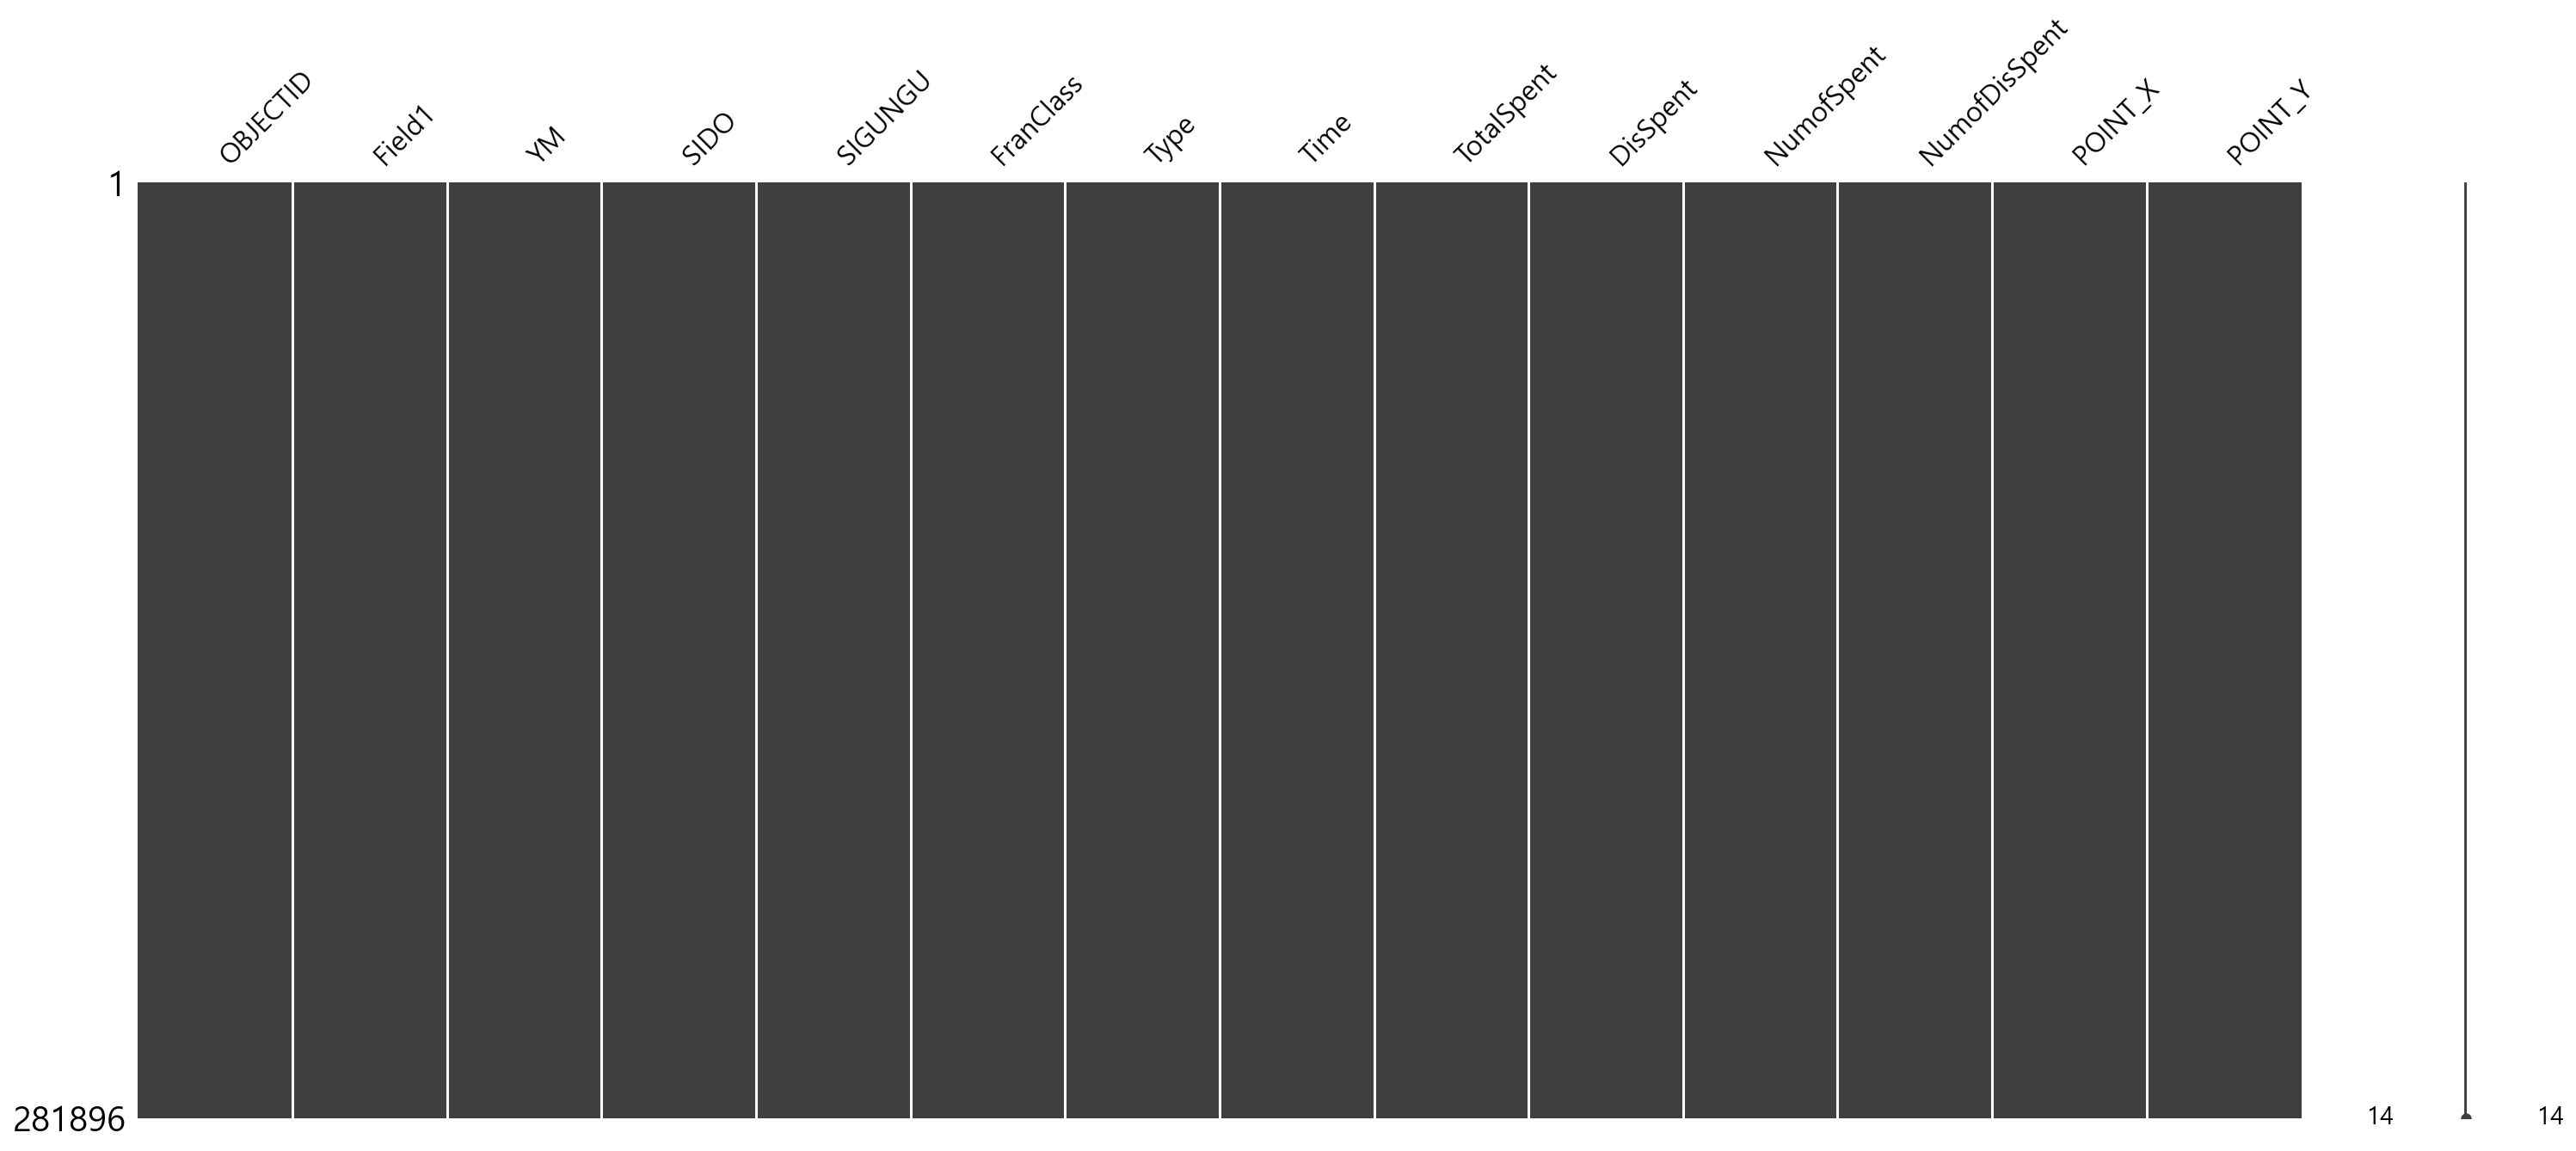

In [3]:
#nan데이터 있는지 확인
df_6 = raw_data_6.copy()
msno.matrix(df_6)

In [4]:
# X,Y좌표 pyproj 이용해서 위도, 경도로 변경
# UTMK좌표계
from pyproj import Proj, transform
# ITRF좌표계
proj_ITRF = Proj(init='epsg:5179')
# WGS 좌표계 
proj_WGS84 = Proj(init='epsg:4326')

C:\ANACONDA3-1\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\ANACONDA3-1\lib\site-packages\pyproj\crs\crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
C:\ANACONDA3-1\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: h

In [5]:
# X,Y좌표 pyproj 이용해서 위도, 경도로 변경
# 위도, 경도 columns 생성
df_6['lon'], df_6['lat'] = transform(proj_ITRF, proj_WGS84,df_6['POINT_X'], df_6['POINT_Y'])

<ipython-input-5-19128c5c263d>:3: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  df_6['lon'], df_6['lat'] = transform(proj_ITRF, proj_WGS84,df_6['POINT_X'], df_6['POINT_Y'])


In [6]:
df_6.tail(2)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat
281894,281895,281895,202006,제주특별자치도,제주시,중소,제과점,x시,15000,0,2,0,950524.6587,1.500760e+06,126.967369,33.497551
281895,281896,281896,202006,제주특별자치도,제주시,중소1,중국음식,x시,15000,0,1,0,950574.6388,1.500760e+06,126.967907,33.497555


In [7]:
# df_6['lon'],df_6['lon']은 모두 float타입
df_6['lon'],df_6['lon']

(0         126.178894
 1         126.178884
 2         126.179458
 3         126.179430
 4         126.179412
              ...    
 281891    126.964662
 281892    126.964496
 281893    126.964496
 281894    126.967369
 281895    126.967907
 Name: lon, Length: 281896, dtype: float64,
 0         126.178894
 1         126.178884
 2         126.179458
 3         126.179430
 4         126.179412
              ...    
 281891    126.964662
 281892    126.964496
 281893    126.964496
 281894    126.967369
 281895    126.967907
 Name: lon, Length: 281896, dtype: float64)

In [10]:
# 시간을 시간대로 변경(object -> string)
df_6['Time']= df_6['Time'].astype(str)
df_6['Time']

0         00시
1         00시
2         00시
3         00시
4         00시
         ... 
281891     x시
281892     x시
281893     x시
281894     x시
281895     x시
Name: Time, Length: 281896, dtype: object

In [8]:
# int 와 if function하기전 불필요한 '시' 제거
df_6['Time'] = df_6['Time'].str.replace('시','')
df_6.head(1)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat
0,1,1,202006,제주특별자치도,제주시,영세,일반한식,00,502000,0,10,0,877005.9834,1479766.073,126.178894,33.302315


In [17]:
# 새벽 2-6 오전 6-11 점심 11-15 오후 15-18  저녁 18-22 심야 22-02 무승인거래 
# x : 무승인 거래(별도 승인 없이 결제되는 건(SMS자동결제, 기내 면세점 등))
# 각 시간을 시간대별로 분류하는 함수 생성
def time_zone(time):
    if '02' <= time <'06':
        return '새벽'
    elif '06' <= time <'11':
        return '오전'
    elif '11' <= time <'15':
        return '점심'
    elif '15' <= time <'18':
        return '오후'
    elif '18' <= time <'22':
        return '저녁'
    else:
        return '심야'

In [19]:
# transform 함수를 이용해 새로운 column 'time_zone'생성
df_6['time_zone'] = df_6['Time'].transform(time_zone)

In [14]:
# x 타입은 무승인 거래로 변경
df_6['time_zone'] = df_6['Time'].str.replace('x','무승인거래')

In [15]:
# 확인
df_6.tail(2)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,time_zone
281894,281895,281895,202006,제주특별자치도,제주시,중소,제과점,x,15000,0,2,0,950524.6587,1.500760e+06,126.967369,33.497551,무승인거래
281895,281896,281896,202006,제주특별자치도,제주시,중소1,중국음식,x,15000,0,1,0,950574.6388,1.500760e+06,126.967907,33.497555,무승인거래


In [20]:
df_6.head(2)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,time_zone
0,1,1,202006,제주특별자치도,제주시,영세,일반한식,00,502000,0,10,0,877005.9834,1.479766e+06,126.178894,33.302315,심야
1,2,2,202006,제주특별자치도,제주시,영세,단란주점,00,1520000,0,8,0,877005.7447,1.479816e+06,126.178884,33.302766,심야


In [21]:
# 다양한 업종이 존재
df_6['Type'].unique()

array(['일반한식', '단란주점', '편의점', '주점', '스넥', '콘도', '일식회집', '기타음료식품', '기타숙박업',
       '노래방', '기타잡화', '중국음식', '당구장', '서양음식', '슈퍼마켓', '유아원', '유흥주점',
       '기타레져업', '농축수산품', '골프경기장', '세탁소', '위탁급식업', '기타유통업', '문화취미기타',
       '주유소', '스포츠레져용품', '구내매점', '특급호텔', '볼링장', '신발', '기타회원제형태업소', '제과점',
       '피부미용실', '칵테일바', '골프용품', '사무서비스', 'LPG', '세차장', '영화관', '주차장',
       '종합병원', '사우나', '학원(회원제형태)', '화장품', '헬스크럽', '의원', '2급호텔', '독서실',
       '주류판매점', '골프연습장', '기타대인서비스', '성인용품점', '화물운송', '애완동물', '안마스포츠마사지',
       '정장', '동물병원', '약국', '상품권', '인터넷Mall', '항공사', '레져업소(회원제형태)', '1급호텔',
       '침구수예점', '악세사리', '보관창고업', '기념품점', '화원', '미용원', '종합용역', '목재석재철물',
       '인터넷종합Mall', '대형할인점', '기타연료', '조명기구', '문구용품', '사진관', '자동차정비',
       '컴퓨터', '조세서비스', '기타의료기관및기기', '유류판매', '기계공구', '보일러펌프', '기타업종',
       '미곡상', '건축요업품', '렌트카', '소프트웨어', '택시', '수영장', '비료농약사료종자', '농축협직영매장',
       '기타건축자재', '농기계', '정육점', '페인트', '스포츠의류', '양품점', '자동차부품', '기타가구',
       '관광여행', '이용원', '면세점', '종합레져타운', '일반서적', '냉열기기', '주방용식기', '인테리어'

In [22]:
# 'Type' 컬럼을 이용하여 새로운 데이터 프레임 생성
df_6_1 =  df_6[['Type']]
df_6_1.head(2)

,Type
0,일반한식
1,단란주점


In [23]:
# 업종이 매우 많으므로 시각화를 위해 업종별로 묶어주기로 함
# 교육/학원, 문화/오락, 의료, 미용, 쇼핑, 식료품, 여행/숙박, 건축/기타 외식
# 유흥/주점, 레저/스포츠, 농업, 생활/인테리어, 교통/자동차, 서비스로 구분
df_6_1.replace(dict.fromkeys({'외국어학원', '보습학원', '유아원', '기능학원', '기타교육', '독서실', '학원(회원제형태)', '초중고교육기관', '대학등록금', '컴퓨터학원', '문구용품', '기타서적문구', '학습지교육', '예체능학원','완구점', '전문서적', '출판인쇄물', '서적출판(회원제형태)', '산후조리원', '과학기자재'}, '교육/학원'), inplace=True)
df_6_1.replace(dict.fromkeys({'노래방', '문화취미기타', '볼링장', '티켓', '영화관', '상품권','악기점', '일반서적', '화랑', '수족관'}, '문화/오락'), inplace=True)
df_6_1.replace(dict.fromkeys({'약국', '의원', '종합병원', '의료용품', '기타의료기관및기기', '한의원', '한약방', '치과의원', '치과병원', '병원', '제약회사', '건강진단'}, '의료'), inplace=True)
df_6_1.replace(dict.fromkeys({'피부미용실', '안마스포츠마사지','미용원' '화장품', '이용원', '미용재료'}, '미용'),inplace=True)
df_6_1.replace(dict.fromkeys({'인터넷종합Mall', '악세사리', '기타잡화', '면세점', '성인용품점', '가전제품', '스포츠의류', '정장', '가방', '기타가구', '옷감직물', '카메라', '양품점', '시계', '안경', '화방표구점', '소프트웨어', '인터넷Mall', 'DVD음반테이프판매', '기념품점', '민예공예품', '골동품점', '신발', '기타의류', '단체복', '아동의류', '컴퓨터', '기타사무용', '맞춤복점', '귀금속', '캐쥬얼의류', '제화점', 'CATV', '사무기기'}, '쇼핑'), inplace=True)
df_6_1.replace(dict.fromkeys({'편의점', '대형할인점', '슈퍼마켓', '주류판매점', '제과점', '농축수산품', '농협하나로클럽', '정육점', '구내매점','스넥', '기타음료식품', '기타건강식', '연쇄점', '인삼제품', '홍삼제품'}, '식료품'), inplace=True)
df_6_1.replace(dict.fromkeys({'콘도', '특급호텔', '2급호텔', '기타숙박업', '1급호텔', '항공사', '관광여행'}, '여행/숙박'),inplace=True)
df_6_1.replace(dict.fromkeys({'기계공구', '기타건축자재', '건축요업품','유리', '목재석재철물', '인테리어', '조명기구', '냉열기기', '보일러펌프', '페인트', '철제가구', '일반가구', '침구수예점', '기타연료', '기타광학품', '기타업종'}, '건축/기타'), inplace=True)
df_6_1.replace(dict.fromkeys({'단란주점', '주점','유흥주점','기타회원제형태업소', '칵테일바'}, '유흥/주점'),inplace=True)
df_6_1.replace(dict.fromkeys({'골프경기장', '헬스크럽', '기타레져업', '당구장', '레져업소(회원제형태)', '수영장', '테니스장', '기타대인서비스', '스포츠레져용품', '골프용품', '레져용품수리', '골프연습장', '종합레져타운'}, '레저/스포츠'), inplace=True)
df_6_1.replace(dict.fromkeys({'농축협직영매장', '비료농약사료종자', '미곡상', '농기계'}, '농업'), inplace=True)
df_6_1.replace(dict.fromkeys({'사우나','세탁소', '공공요금', '위탁급식업', '애완동물', '동물병원', '정수기', '기타전기제품', '주방용구', '카페트커텐천막', '기타직물', '내의판매점', '주방용식기'},'생활/인테리어'), inplace=True)
df_6_1.replace(dict.fromkeys({'주차장', '주유소', '렌트카', '기타자동차서비스', '자동차부품', '견인서비스', '자동차정비', 'LPG', '세차장', '자동차시트타이어', '택시', '중고자동차', '수입자동차', '유류판매', '카인테리어', '기타교통수단', '이륜차판매', '윤활유전문판매'}, '교통/자동차'), inplace=True)
df_6_1.replace(dict.fromkeys({'화원', '화물운송', '사진관', '보관창고업','사무서비스', '가례서비스', '기타대인서비스', '기타수리서비스', '법률회계서비스', '사무서비스(회원제형태)','조세서비스',  '기타용역서비스', '부동산분양', '기타유통업', '종합용역', '기타운송', '사무통신기기수리', '가정용품수리', '중장비수리', '부동산중개임대', '신변잡화수리', '손해보험', '정기간행물', '건강식품(회원제형태)','기타보험', '손해보험', '기타비영리유통', '통신기기'}, '서비스'), inplace=True)
df_6_1.replace(dict.fromkeys({'일반한식', '서양음식', '일식회집', '중국음식'}, '외식'), inplace=True)

C:\ANACONDA3-1\lib\site-packages\pandas\core\frame.py:4521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [24]:
# 확인
df_6_1

,Type
0,외식
1,유흥/주점
2,식료품
3,식료품
4,외식
...,...
281891,외식
281892,외식
281893,식료품
281894,식료품


In [25]:
# 두개의 데이터 프레임을 병합
df_6 = pd.merge(df_6,df_6_1,right_index=True,left_index=True)
df_6.head(2)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type_x,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,time_zone,Type_y
0,1,1,202006,제주특별자치도,제주시,영세,일반한식,00,502000,0,10,0,877005.9834,1.479766e+06,126.178894,33.302315,심야,외식
1,2,2,202006,제주특별자치도,제주시,영세,단란주점,00,1520000,0,8,0,877005.7447,1.479816e+06,126.178884,33.302766,심야,유흥/주점


In [26]:
# column 명 변경
df_6 = df_6.rename(columns = {'Type_x':'Type','Type_y':'classification'})
df_6.head()

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,time_zone,classification
0,1,1,202006,제주특별자치도,제주시,영세,일반한식,00,502000,0,10,0,877005.9834,1.479766e+06,126.178894,33.302315,심야,외식
1,2,2,202006,제주특별자치도,제주시,영세,단란주점,00,1520000,0,8,0,877005.7447,1.479816e+06,126.178884,33.302766,심야,유흥/주점
2,3,3,202006,제주특별자치도,제주시,중소1,편의점,00,482310,0,35,0,877056.6756,1.479616e+06,126.179458,33.300971,심야,식료품
3,4,4,202006,제주특별자치도,제주시,영세,편의점,00,38050,5450,3,1,877055.9593,1.479766e+06,126.179430,33.302323,심야,식료품
4,5,5,202006,제주특별자치도,제주시,영세,일반한식,00,32000,32000,1,1,877055.4817,1.479866e+06,126.179412,33.303224,심야,외식


In [27]:
# 저장!
df_6.to_csv('./data/df_6.csv', sep=',', encoding='euc-kr')